In [1]:
import numpy as np
import pandas as pd
# im
import matplotlib.pyplot as plt
import seaborn as sns

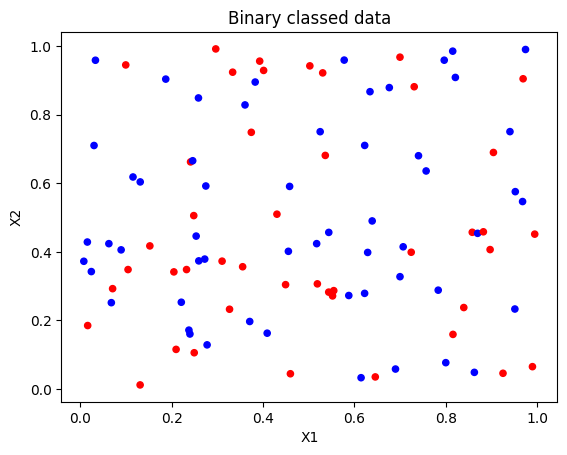

In [379]:
np.random.seed(0)
n=100
m=2


def plot_data(X,y,colors,title='Closed form solution',pltobj=None):
    colors_=['red' if val==1 else 'blue' for val in colors]
    xlabel='X'
    ylabel='y'
    if pltobj is None:
        pltobj=plt
        # pltobj.scatter(X,y)
        pltobj.scatter(X,y,c=colors_,s=20)
        pltobj.xlabel('X1')
        pltobj.ylabel('X2')
        pltobj.title(title)
        
    else:
        pltobj.scatter(X,y,colors=colors_)

        pltobj.set_xlabel('X')
        pltobj.set_ylabel('y')
        pltobj.set_title(title)

def random_data(n,m=2,a=3,b=4,plotting=False):
    '''generate random linear data of given shape with some gaussian noise'''

    X=np.random.rand(n,m) #returns random value in a given shape, in this case nx1 (uniform probability distribution)
    h=b + a*X+ np.random.randn(n,1) #the randn function is similar. except it generates gaussian noise
    if plotting==True:
        # plot_data(X,h,title='Data')
        plt.show()

    a=-0.7
    b=0.9
    # b=4
    X=np.random.rand(n,m) #returns random value in a given shape, in this case nx1 (uniform probability distribution)
    h= a*X[:,0:1]+b*X[:,1:2] + np.random.randn(n,1)
    ind=np.argsort(X[:,0],axis=0)
    # X[:,0]=np.take_along_axis(X[:,0],ind,axis=0)
    # h=np.take_along_axis(h,ind,axis=0)

    prob=1/(1+np.exp(h))
    y=np.random.binomial(1,prob)
    return X,y
    # np.sum(y) #sum is 43 so somewhat equally likely



    # return X,y
X,y=random_data(100)
sorted_indices = np.lexsort((X[:, 1], X[:, 0]))

# Use sorted indices to rearrange the original array
X = X[sorted_indices]
np.sort(X,axis=0)
np.sort(X,axis=1)
plot_data(X[:,0:1],X[:,1:2],y,title='Binary classed data')

In [260]:
def mse(x1,x2):
    n=x1.shape[0]
    return (0.5/n)*np.sum(np.square((x1-x2)))

def sigmoid(x):
    return (1/(1+np.exp(h)))

def grad(X,y,w,regulariser=None,alpha=0):
    '''1D batch gradient descent''' 
    n,m=X.shape
    A=np.zeros((m,m))
    if regulariser in ['l2','ridge']:
        A=np.eye(m)
        A[0][0]=0
    elif regulariser in ['l1','lasso']:
        pass
    #note: @ means matrix mulitplication (np.matmul)
    h=X@w
    sig=sigmoid(h)-y
    sig=1/(1+np.exp(h))
    sig-=y
    # print(h.shape)
    # print(h.shape)
    
    # print("multing " )
    # # print((X.T).shape)
    # print(h.shape)

    # print(sigmoid(h).shape)
    # print(sig.shape)
    return (2/n)*((X.T)@(sig)) #gradient vector   
    # return (2/n)*(X.T)@(sigmoid(X@w)-y) + alpha*A@w#gradient vector   
    #
w=np.random.randn(m,1)
# X[:2].shape
# y[:2].shape
# # w.shape
# grad(X[:2],y[:2],w)
# X.shape



In [246]:
# h=X@w
sigmoid(h).shape

(100, 1)

In [169]:
(X.T)@(X@w)
# (X@w).shape

array([[-17.08346832],
       [ -6.89516302]])

In [375]:
def get_eta_stochastic(t,t0=5,t1=50):
    t0=np.random.randn()
    t1=np.random.randn()
    return t0/(t+t1)

def get_weights_stochastic_grad_descent(X,y,*,epochs,t0=5,t1=50,wlist=None,regulariser=None,alpha=0):
    # the * force parameteres after that as keyword only arguments
    n,m=X.shape
    w=np.random.randn(m,1)
    # while epochs>1:
    # print(w)
    for epoch in range(epochs):
        for i in range(n):
            eta=get_eta_stochastic(n*epoch+i)
            r=np.random.randint(n)
            learning_rate=get_eta_stochastic(n*epoch+i,t0,t1)
            
            delta_w=grad(X[r:r+1],y[r:r+1],w,regulariser,alpha)
            # print(delta_w.shape)
            w-=eta*delta_w
        if (wlist is not None):
            wlist.append((w[0][0],w[1][0]))
            pass
    return w

# wlist_stochastic=[]
w=get_weights_stochastic_grad_descent(X,y,epochs=100)
# get_weights_stochastic_grad_descent(X_,y,epochs=100,t0=10,wlist=wlist_stochastic)
w

# plot_data(X[:,0:1],X[:,1:2],y,title='Binary classed data')
h=X@w
sig=sigmoid(h)
pred=np.where(sig>0.5,1,0)
sum(pred)
# pred
# sig

array([47])

Text(0.2, 0.002, 'Above the boundary: red \n,below the boundary : blue')

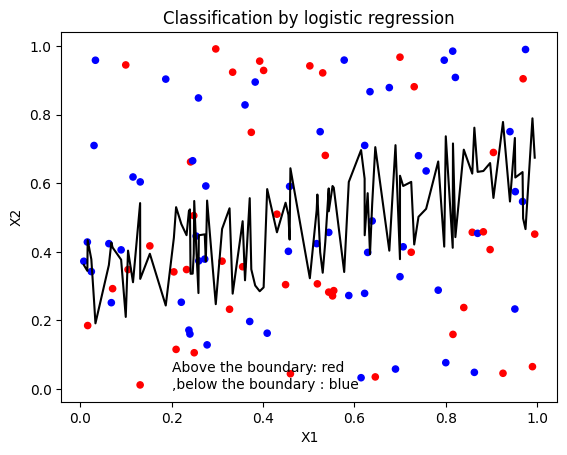

In [392]:
plot_data(X[:,0:1],X[:,1:2],y,title='Classification by logistic regression')
plt.plot(X[:,0:1],sig,c='black')
plt.text(0.2,0.002,"Above the boundary: red \n,below the boundary : blue")

In [23]:
prob.shape

(100, 2)